# Grid Search Method

What is the grid search method?

Grid search is a straightforward method for hyperparameter optimization in ML. It is a well-known approach (after the random search method) commonly 
employed by ML practitioners due to its simplicity and convenience of implementation. We’ll learn its theory and how to apply it in a simple ML project
using the open-source Python library called scikit-learn.

The grid search procedure begins with the specification of a set of possible values for each hyperparameter. For instance, if the ML model includes
two hyperparameters, one for the learning rate and one for the number of estimators, the learning rate can be set to 0.1, 0.01, or 0.001, and the 
number of estimators can be set to 10, 20, or 50.

Once the value range for each hyperparameter has been set, the grid search method will train and evaluate an ML model for each hyperparameter value 
combination. This can be computationally expensive, especially if there are a large number of hyperparameters and alternative values for each.
Nonetheless, it is a straightforward and widely used method to find the best hyperparameters.

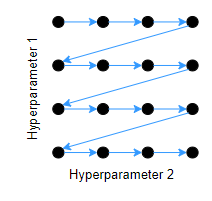

The above illustration shows how the grid search method selects each possible combination of hyperparameter values.

Grid search is an exhaustive method, meaning that it searches the entire grid of hyperparameter values, rather than stopping after a certain number of iterations or when it finds a good enough set of parameters.

For example, if the ML algorithm has seven hyperparameters and each one of them has five different values for optimization, this means that the ML model will be trained 78,125 times in total to find the best combination of hyperparameter values.

It is recommended to implement the grid search method on a powerful computer or cloud computing technology (AWS, AZURE, GCP) if:

There are many hyperparameters for optimization.

There are many different values for each hyperparameter.

The dataset for the ML project is very large.

Therefore, the grid search is a method for hyperparameter optimization that is preferable to use in the following situations:

When the number of hyperparameters is small

When the ML algorithm is simple and does not require much expertise to implement

When the dataset is relatively small


# 1.1. Import Important packages
First, we import important Python packages that will do the following tasks:

Load the dataset.
Clean the dataset.
Process the dataset using feature engineering techniques.
Create and train machine learning model (logistic regression).
Check machine learning model performance.
Implement the grid search method.
Identify combination of hyperparameters that provide the best results.

In [1]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

# 1.2 : load the Dataset and perform EDA

In [2]:
# load data
data_path = "loan_data_set.csv"

data = pd.read_csv(data_path)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 1.3 : Check for missing values

In [12]:
round(100*(data.isnull().sum()/(len(data.index))),2)

,0
Loan_ID,0.00
Gender,2.12
Married,0.49
Dependents,2.44
Education,0.00
Self_Employed,5.21
ApplicantIncome,0.00
CoapplicantIncome,0.00
LoanAmount,3.58
Loan_Amount_Term,2.28


In [13]:
data['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [14]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [15]:
# replace with numerical values
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [17]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [18]:
# handle the missing data
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [19]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [20]:
# drop the ID column
data = data.drop('Loan_ID',axis=1)

In [21]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# 1.4 : Evaluate class distribution

In [22]:
data.Loan_Status.value_counts()

,count
Loan_Status,
1,422
0,192


# 1.5. Split Feature and Target variables

In [23]:
#split features and target from  data
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status.values

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [26]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [31]:
X.Credit_History.value_counts()

,count
Credit_History,
1.0,525
0.0,89


# 1.6. Preprocess the features
However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use:

The MinMaxScaler() method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
The get_dummies() method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [32]:
# scale the numerical columns with MinMaxScaler()
X["ApplicantIncome"] = MinMaxScaler().fit_transform(X["ApplicantIncome"].values.reshape(-1,1))
X["LoanAmount"] = MinMaxScaler().fit_transform(X["LoanAmount"].values.reshape(-1,1))
X["CoapplicantIncome"] = MinMaxScaler().fit_transform(X["CoapplicantIncome"].values.reshape(-1,1))
X["Loan_Amount_Term"] = MinMaxScaler().fit_transform(X["Loan_Amount_Term"].values.reshape(-1,1))

# change categorical features to numerical with get_dummies()
X = pd.get_dummies(X)

# convert the DataFrame to a NumPy array.
X = X.to_numpy()

In [36]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.070489,0.0,0.172214,0.74359,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
1,0.05483,0.036192,0.172214,0.74359,1.0,False,True,False,True,False,False,True,False,True,False,True,False,True,False,False
2,0.03525,0.0,0.082489,0.74359,1.0,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True
3,0.030093,0.056592,0.160637,0.74359,1.0,False,True,False,True,False,True,False,False,False,True,True,False,False,False,True
4,0.072356,0.0,0.191027,0.74359,1.0,False,True,True,False,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.0,0.089725,0.74359,1.0,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False
610,0.04893,0.0,0.044863,0.358974,1.0,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False
611,0.097984,0.00576,0.353111,0.74359,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True
612,0.091936,0.0,0.257598,0.74359,1.0,False,True,False,True,False,False,False,True,True,False,True,False,False,False,True


# 1.7. Train a Base Machine ## Train a base machine learning model¶

In this example,we will train the Logistic Regression algorithm with default hyperparameter values using the Cross-validation technique to check the model performance.

In [55]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

In [56]:
# create a classifier
logistic_classifier = LogisticRegression()

In [57]:
# define function to evaluate f1_score
def f1_scorer(estimator, X, y):
    y_preds = estimator.predict(X)
    f1 = f1_score(y, y_preds, average='macro')
    return round(f1, 4)


# implement and run the cross_val_score method
score = cross_val_score(estimator=logistic_classifier,
                        X=X,
                        y=y,
                        scoring=f1_scorer,
                        cv=3,
                        n_jobs=-1)

# print the mean score
print(round(score.mean(), 4))

0.7305


# 1.8. Implement the grid search method
Since we know how well the machine learning model works with the default hyperparameter values, we can try to improve the model's performance by using the grid search method to find the combination of hyperparameter values that can give an F1-score of more than 0.7305

The logistic regression has multiple hyperparameters, as shown below:

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None) source

But for this example, will use the following important hyperparameters to find the right combination of their values to get an F1-score greater than 0.7305.

penalty: Specifies the penalty's norm

c: Inverse of the regularization strength

Solver: The algorithm to use in the optimization problem

tol: The tolerance for stopping criteria

warm_start: When set to true, it will reuse the solution of the previous call to fit as initialization. Otherwise, it will erase the previous solution.
max_iter: Represents the maximum number of iterations for the solvers to converge


To implement the grid search method using the scikit-learn library, we need to define the following important parameters.

estimator: The machine learning algorithm to train with different combinations of hyperparameter values.
param_grid: This is the dictionary with parameter names (string value) as keys and distributions or lists of parameters to try (search space).
scoring: The method to evaluate the performance of the cross-validated model. For this example, we will use the F1-score.
CV: The number of folds for cross-validation. The standard numbers are 5 and 10.

In [58]:
# define the parameters for the grid search method

#1. estimator
logistic_classifier = LogisticRegression()

#2. param distributions (define the search space)
distributions = dict(penalty=['l2', 'l1', 'elasticnet'],
                     C=[0.01, 0.1, 0.5, 0.9, 1.0],
                     solver=['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
                     tol=[1e-3, 1e-4, 1e-5, 1e-6],
                     warm_start=[False, True],
                     max_iter=[10, 50, 100, 200, 300, 400])

#4. scoring
scoring = f1_scorer

#5. cross-validation splitting strategy
cv = 3

In [59]:
# import the grid search method from scikit-learn
from sklearn.model_selection import GridSearchCV

# define search
search = GridSearchCV(estimator=logistic_classifier,
                      param_grid=distributions,
                      scoring=scoring,
                      cv=cv,
                      verbose=2)

In [60]:
# execute search
results = search.fit(X , y)

Streaming output truncated to the last 5000 lines.
[CV] END C=0.5, max_iter=300, penalty=l2, solver=liblinear, tol=1e-05, warm_start=True; total time=   0.0s
[CV] END C=0.5, max_iter=300, penalty=l2, solver=liblinear, tol=1e-05, warm_start=True; total time=   0.0s
[CV] END C=0.5, max_iter=300, penalty=l2, solver=liblinear, tol=1e-06, warm_start=False; total time=   0.0s
[CV] END C=0.5, max_iter=300, penalty=l2, solver=liblinear, tol=1e-06, warm_start=False; total time=   0.0s
[CV] END C=0.5, max_iter=300, penalty=l2, solver=liblinear, tol=1e-06, warm_start=False; total time=   0.0s
[CV] END C=0.5, max_iter=300, penalty=l2, solver=liblinear, tol=1e-06, warm_start=True; total time=   0.0s
[CV] END C=0.5, max_iter=300, penalty=l2, solver=liblinear, tol=1e-06, warm_start=True; total time=   0.0s
[CV] END C=0.5, max_iter=300, penalty=l2, solver=liblinear, tol=1e-06, warm_start=True; total time=   0.0s
[CV] END C=0.5, max_iter=300, penalty=l2, solver=newton-cg, tol=0.001, warm_start=False; t

At the end of the search, we can use the following attributes to access all the results.

best_estimator: The estimator that gave the highest score

best_params: The combination of hyperparameters that gave the best results

best_scores: The mean cross-validated score of the best_estimator

In [61]:
# show the best estimator
print("best estimator:", results.best_estimator_)

best estimator: LogisticRegression(C=0.5, max_iter=10, solver='sag', tol=0.001)


In [62]:
# show the best combination of hyperparameters
print("best combination of hyperparameters:", results.best_params_)

best combination of hyperparameters: {'C': 0.5, 'max_iter': 10, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001, 'warm_start': False}


In [63]:
# show the best score after performing the random search method
print("Best score:", round(results.best_score_,4))

Best score: 0.7356


In [ ]:
The best score is 0.7356, which is slightly greater than 0.7305.

As we can see the performance of the ML model has slightly increased compared to the ML model trained with default hyperparameters.

It is recommended to add more options and values of hyperparameters on the param_grid attribute and then try to rerun it again, it might be able to
provide better results than what we have found.

# Advantages of the grid search method

Coverage: It ensures that every possible combination of hyperparameters is tested, therefore providing full coverage of the hyperparameter space. This
can help to find the best combination that produces the best performance of the ML model based on the defined hyperparameters and their values.

Simplicity: It is easy to implement and understand, making it a simple and straightforward approach for hyperparameter optimization. We just need to define the ML algorithm, parameters distribution, and the evaluation metrics for it to start the optimization process.

Reproducibility: This approach makes it possible to easily reproduce results through the use of a set of hyperparameters that are predefined.

Flexibility: It is a flexible method for hyperparameter optimization because it can be easily changed to work with different ML algorithms and hyperparameters. This makes it a great choice for hyperparameter optimizat

# Disadvantages of the grid search method

Computational cost: The method involves training and evaluating the ML model multiple times for different combinations of hyperparameters, which can be computationally expensive and time-consuming. This can become a significant disadvantage when working with large datasets or complex ML models.

Overfitting: When applied, it can lead to overfitting of the model if the grid is too fine-grained or if the number of training samples is too small. This can result in an ML model that performs well on the training data but poorly on unseen data.

Limited exploration: It only explores the hyperparameter values that are specified in the grid, which means that it may miss out on other optimal values of the hyperparameters that are not included in the grid. This can limit the performance of the model and lead to suboptimal result

In summary, the grid search method is an effective and easy-to-use method for hyperparameter optimization. To take full advantage of the grid search method, it is advised to have powerful computational resources, address overfitting challenges, and explore more hyperparameter values during the optimization process. Additionally, it’s a preferred technique for hyperparameter tuning in different ML algorithms.s.ion.